In [1]:
# 자율주행, 딥드림, 영상에 주석, x_ray을 보고 병분부위 찾는, 비파괴검사를 대처..
# CNN - RNN - FastRNN - VOLO5 

In [2]:
# 컴퓨터 비전 -> 인공지능 중요 연구분야 중에 하나

In [3]:
# 자연영상 CIFAR-10
# airplane, automobile,bird,cat,deer,dog,frog,horse,ship,truck  10
# 영상 32 32 맵  32,32,3  - reshape가 필요 없다

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D   
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical # one hot encoding

In [2]:
# 데이터셋을 읽어서 신경망에 입력형태로 변환 : 데이터로드 ,표준화, onehotencoding
(x_train,y_train),(x_test,y_test) =   cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train,y_test = to_categorical(y_train), to_categorical(y_test)

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
x_train.shape[1:]

(32, 32, 3)

In [3]:
# 신경망 모델 설계
# CCPD CCPD FL FC DO FC

In [8]:
cnn = Sequential()
cnn.add(Conv2D(32,(3,3), activation = 'relu',input_shape=x_train.shape[1:] ) )
cnn.add(Conv2D(32,(3,3), activation = 'relu' ) )
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), activation = 'relu' ))
cnn.add(Conv2D(64,(3,3), activation = 'relu' ) )
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [9]:
# 신경망 학습
cnn.compile(loss=categorical_crossentropy,optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=[x_test,y_test])

Epoch 1/30
391/391 [==============================] - 14s 12ms/step - loss: 1.6503 - accuracy: 0.3895 - val_loss: 1.2937 - val_accuracy: 0.5355
Epoch 2/30
391/391 [==============================] - 4s 11ms/step - loss: 1.2643 - accuracy: 0.5481 - val_loss: 1.1137 - val_accuracy: 0.5978
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0994 - accuracy: 0.6079 - val_loss: 1.0046 - val_accuracy: 0.6486
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9825 - accuracy: 0.6524 - val_loss: 0.8573 - val_accuracy: 0.6960
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9043 - accuracy: 0.6812 - val_loss: 0.8167 - val_accuracy: 0.7145
Epoch 6/30
391/391 [==============================] - 4s 11ms/step - loss: 0.8318 - accuracy: 0.7090 - val_loss: 0.7809 - val_accuracy: 0.7313
Epoch 7/30
391/391 [==============================] - 4s 11ms/step - loss: 0.7846 - accuracy: 0.7225 - val_loss: 0.7229 - val_accuracy: 0.746

In [10]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6266 - accuracy: 0.7961


[0.6265957951545715, 0.7961000204086304]

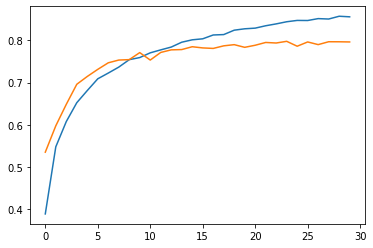

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [14]:
cnn.save("my_cnn.h5")